In [1]:
# 📦 Imports
import json
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "figure.figsize": [8, 6],
    "legend.frameon": False
})

# 📥 Load data function
def extract_error_data(json_file):
    with open(json_file, "r") as f:
        data = json.load(f)

    photon_states = np.array(data["n_photon_states"])
    errors = [data["energies"][str(n)]["error"] for n in photon_states]
    label = f"{data['level_of_theory']} ({data['photon_state_type']})"
    return photon_states, errors, label


In [2]:
# 📁 Select files (manually or with glob)
from glob import glob

# You can manually specify files like this:
files = [
    "pn_casscf_2e2o.txt_analysis.json",
    "cs_casscf_2e2o.txt_analysis.json",
    "pn_casscf_4e4o.txt_analysis.json",
    "cs_casscf_4e4o.txt_analysis.json",
    "pn_casscf_6e6o.txt_analysis.json",
    "cs_casscf_6e6o.txt_analysis.json"
]

# Or automatically load all .json files in current directory:
#json_files = sorted(glob("*.json"))

files


['pn_casscf_2e2o.txt_analysis.json',
 'cs_casscf_2e2o.txt_analysis.json',
 'pn_casscf_4e4o.txt_analysis.json',
 'cs_casscf_4e4o.txt_analysis.json',
 'pn_casscf_6e6o.txt_analysis.json',
 'cs_casscf_6e6o.txt_analysis.json']

In [3]:
# 🎨 Define custom styles per file
# Optional: Add or override style elements here

color1 = "forestgreen"
color2 = "rebeccapurple"
color3 = "salmon"
color4 = "dodgerblue"


styles = {
    "cs_casci_2e2o.txt_analysis.json": {
        "color": color1,
        "linestyle": "-",
        "marker": "o",
        "markerfacecolor": color1,
        "markeredgecolor": color1,
    },
    "pn_casci_2e2o.txt_analysis.json": {
        "color": color1,
        "linestyle": "-.",
        "marker": "o",
        "markerfacecolor": color1,
        "markeredgecolor": color1,
    },
    "cs_casci_4e4o.txt_analysis.json": {
        "color": color2,
        "linestyle": "-",
        "marker": "o",
        "markerfacecolor": color2,
        "markeredgecolor": color2,
    },
    "pn_casci_4e4o.txt_analysis.json": {
        "color": color2,
        "linestyle": "-.",
        "marker": "o",
        "markerfacecolor": color2,
        "markeredgecolor": color2,
    },
    
    # Add other filenames with different styles as needed
}


In [4]:
# 📊 Plot errors with styles

plt.figure(figsize=(8, 6))


photon_states_1, errors_1, label_1 = extract_error_data(files[0])
style_1 = styles.get(files[0], {})

photon_states_2, errors_2, label_2 = extract_error_data(files[1])
style_2 = styles.get(files[1], {})

photon_states_3, errors_3, label_3 = extract_error_data(files[2])
style_3 = styles.get(files[2], {})

photon_states_4, errors_4, label_4 = extract_error_data(files[3])
style_4 = styles.get(files[3], {})

photon_states_5, errors_5, label_5 = extract_error_data(files[4])
style_5 = styles.get(files[4], {})

photon_states_6, errors_6, label_6 = extract_error_data(files[5])
style_6 = styles.get(files[5], {})
    
    #plt.plot(
    #    photon_states, errors,
    #    label=label,
    #    color=style.get("color", None),
    #    linestyle=style.get("linestyle", "-"),
    #    marker=style.get("marker", "o"),
    #    markerfacecolor=style.get("markerfacecolor", "white"),
    #    markeredgecolor=style.get("markeredgecolor", "black"),
    #)





<Figure size 1200x900 with 0 Axes>

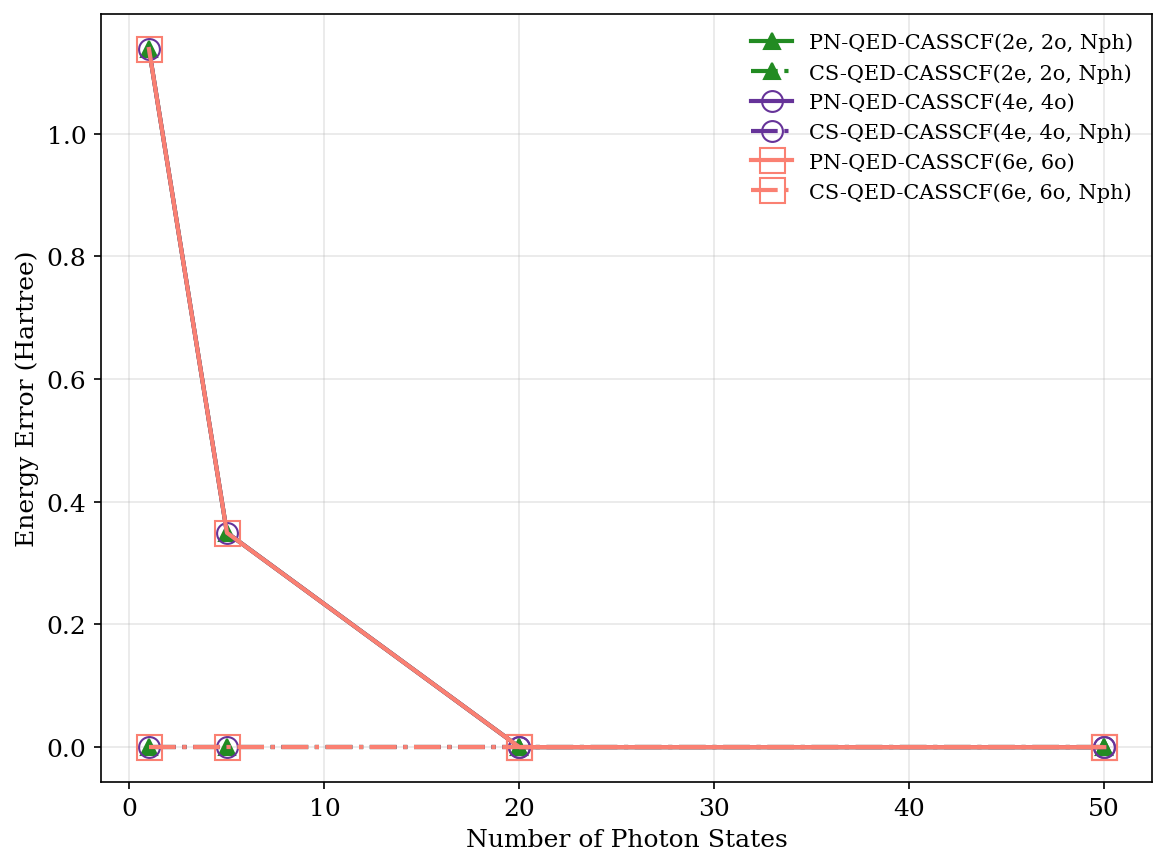

In [5]:
import numpy as np

color1 = "forestgreen"
color2 = "rebeccapurple"
color3 = "salmon"
color4 = "dodgerblue"
plt.plot(photon_states_1, np.abs(errors_1), color=color1, marker="^", markersize=8, mfc=color1, label="PN-QED-CASSCF(2e, 2o, Nph)")
plt.plot(photon_states_2, np.abs(errors_2), linestyle="-.", color=color1, marker="^", markersize=8, mfc=color1, label="CS-QED-CASSCF(2e, 2o, Nph)")
plt.plot(photon_states_3, np.abs(errors_3), color=color2, marker="o", markersize=10, mfc='none', label="PN-QED-CASSCF(4e, 4o)")
plt.plot(photon_states_4, np.abs(errors_4), linestyle="-.", color=color2, marker="o", markersize=10, mfc='none', label="CS-QED-CASSCF(4e, 4o, Nph)")
plt.plot(photon_states_5, np.abs(errors_5), color=color3, marker="s", markersize=12, mfc='none', label="PN-QED-CASSCF(6e, 6o)")
plt.plot(photon_states_6, np.abs(errors_6), linestyle="-.", color=color3, marker="s", markersize=12, mfc='none', label="CS-QED-CASSCF(6e, 6o, Nph)")
plt.xlabel("Number of Photon States", fontsize=12)
plt.ylabel("Energy Error (Hartree)", fontsize=12)
#plt.yscale("log")
#plt.ylim(1e-16,1e1)
#plt.title("Energy Error vs. Photon States", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig("error_vs_photon_states.png", dpi=300)
plt.show()

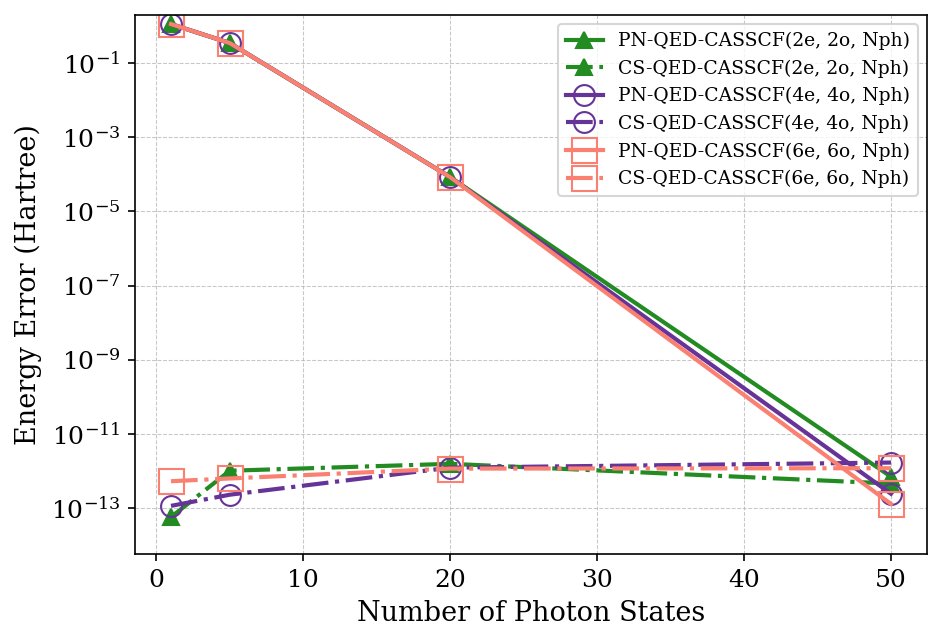

In [6]:
# Main plot
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Plotting data with markers and line styles
ax.plot(photon_states_1, np.abs(errors_1), color=color1, marker="^", markersize=8, mfc=color1, label="PN-QED-CASSCF(2e, 2o, Nph)")
ax.plot(photon_states_2, np.abs(errors_2), linestyle="-.", color=color1, marker="^", markersize=8, mfc=color1, label="CS-QED-CASSCF(2e, 2o, Nph)")
ax.plot(photon_states_3, np.abs(errors_3), color=color2, marker="o", markersize=10, mfc='none', label="PN-QED-CASSCF(4e, 4o, Nph)")
ax.plot(photon_states_4, np.abs(errors_4), linestyle="-.", color=color2, marker="o", markersize=10, mfc='none', label="CS-QED-CASSCF(4e, 4o, Nph)")
ax.plot(photon_states_5, np.abs(errors_5), color=color3, marker="s", markersize=12, mfc='none', label="PN-QED-CASSCF(6e, 6o, Nph)")
ax.plot(photon_states_6, np.abs(errors_6), linestyle="-.", color=color3, marker="s", markersize=12, mfc='none', label="CS-QED-CASSCF(6e, 6o, Nph)")

# Axes labels and scale
ax.set_xlabel("Number of Photon States", fontsize=13)
ax.set_ylabel("Energy Error (Hartree)", fontsize=13)
ax.set_yscale("log")

# Set y-limits based on smallest nonzero error to avoid log(0)
min_nonzero = min(np.min(np.abs(errors)) for errors in [
    errors_1, errors_2, errors_3, errors_4, errors_5, errors_6
] if np.any(np.abs(errors) > 0))
ax.set_ylim(bottom=min_nonzero / 10, top=2)

# Grid, legend, and layout
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
ax.legend(fontsize=9, loc="upper right", frameon=True)
fig.tight_layout()

# Save and show
plt.savefig("error_vs_photon_states.png", dpi=300)
plt.show()

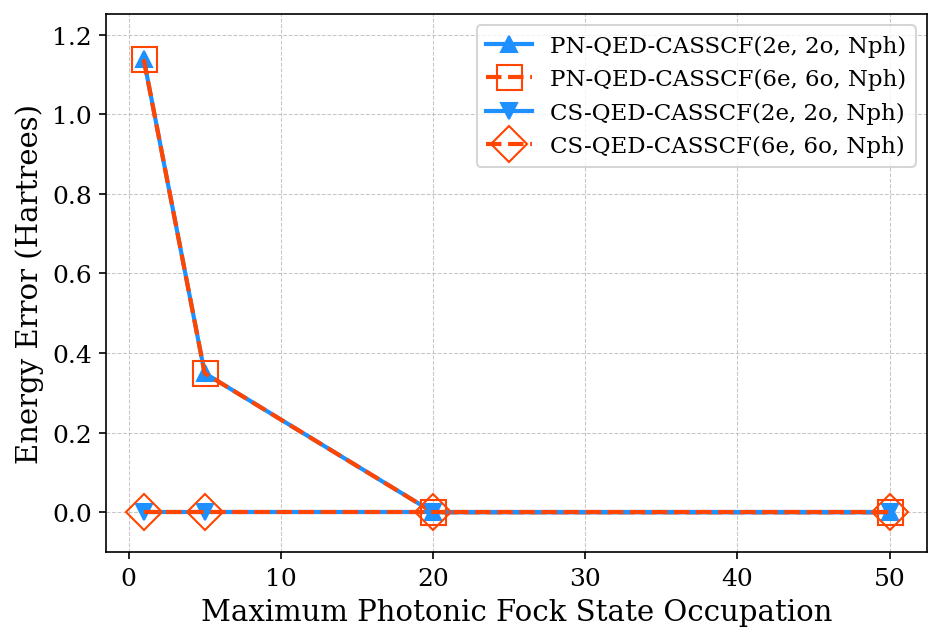

In [8]:
color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

fig, ax = plt.subplots(figsize=(6.5, 4.5))

# PN- data (filled markers, solid lines)
ax.plot(photon_states_1, np.abs(errors_1), color=color4, marker="^", linestyle='-', markersize=8,
        markerfacecolor=color4, markeredgecolor=color4, label="PN-QED-CASSCF(2e, 2o, Nph)")
#ax.plot(photon_states_3, np.abs(errors_3), color=color2, marker="P", linestyle='--', markersize=10,
#        markerfacecolor='none', markeredgecolor=color2, label="PN-QED-CASSCF(4e, 4o)")
ax.plot(photon_states_5, np.abs(errors_5), color=color5, marker="s", linestyle='--', markersize=12,
        markerfacecolor='none', markeredgecolor=color5, label="PN-QED-CASSCF(6e, 6o, Nph)")

# CS- data (hollow markers, dashed lines)
ax.plot(photon_states_2, np.abs(errors_2), color=color4, marker="v", linestyle='-', markersize=8,
        markerfacecolor=color4, markeredgecolor=color4, label="CS-QED-CASSCF(2e, 2o, Nph)")
#ax.plot(photon_states_4, np.abs(errors_4), color=color2, marker="o", linestyle='--', markersize=10,
#        markerfacecolor='white', markeredgecolor=color2, label="CS-QED-CASSCF(4e, 4o)")
ax.plot(photon_states_6, np.abs(errors_6), color=color5, marker="D", linestyle='--', markersize=12,
        markerfacecolor='none', markeredgecolor=color5, label="CS-QED-CASSCF(6e, 6o, Nph)")

# Axis labels
ax.set_xlabel("Maximum Photonic Fock State Occupation", fontsize=14)
ax.set_ylabel("Energy Error (Hartrees)", fontsize=14)

# Linear y-scale: expand y-limits for visibility
all_errors = np.concatenate([
    np.abs(errors_1), np.abs(errors_2), np.abs(errors_3),
    np.abs(errors_4), np.abs(errors_5), np.abs(errors_6)
])
ymin = -0.1
ymax = np.max(all_errors) * 1.1 if np.max(all_errors) > 0 else 1e-3
ax.set_ylim(ymin, ymax)

# Grid and legend
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.legend(fontsize=11, frameon=True, loc="best")
fig.tight_layout()

# Save and show
plt.savefig("error_vs_photon_states.png", dpi=600)
plt.show()